In [8]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torch
import pickle
plt.rcParams['figure.figsize'] = 15, 10

# Initializing the transform for the dataset
transform = torchvision.transforms.Compose([
	torchvision.transforms.ToTensor(),
	
])


with open("../../data/scratch/img_pairs.pkl", "rb") as f:
	train_dataset = pickle.load(f)

transformed_train_dataset = [(transform(image), transform(label)) for image, label in train_dataset]

n = len(transformed_train_dataset)
train_data = transformed_train_dataset[:int(n*0.9)]
val_data = transformed_train_dataset[int(n*0.9):]





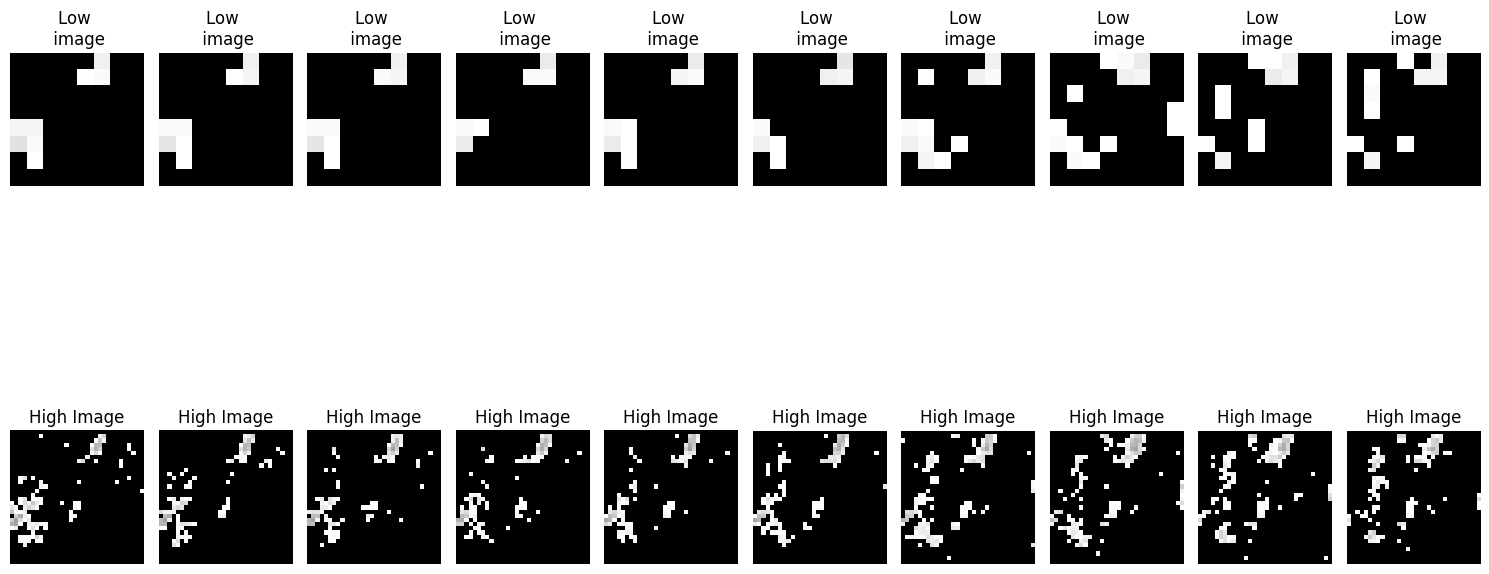

In [9]:
# load pickle file from ../data/scratch/img_pairs.pkl




counter = 1


iplus = 600

for idx in range(10):
	idx = idx + iplus
	val = transformed_train_dataset[idx][0]
	plt.subplot(2, 10, counter)
	plt.title("Low \n image")
	plt.imshow(val.reshape(8, 8), cmap='gray')
	plt.axis('off')

	# Incrementing subplot counter
	counter += 1

for idx in range(10):
    idx = idx + iplus
    val = transformed_train_dataset[idx][1]
    plt.subplot(2, 10, counter)
    plt.imshow(val.reshape(32, 32), cmap='gray')
    plt.title("High Image")
    plt.axis('off')

	# Incrementing subplot counter
    counter += 1

plt.tight_layout()
plt.show()


In [11]:
# Creating a DeepAutoencoder class
class DeepAutoencoder(torch.nn.Module):
	def __init__(self):
		super().__init__()
		
		self.decoder = torch.nn.Sequential(
			torch.nn.Linear(64, 64),
			torch.nn.ReLU(),
			torch.nn.Linear(64, 128),
			torch.nn.ReLU(),
			torch.nn.Linear(128, 256),
			torch.nn.ReLU(),
   			torch.nn.Linear(256, 512),
			torch.nn.ReLU(),
   			torch.nn.Linear(512, 768),
			torch.nn.ReLU(),
			torch.nn.Linear(768, 32 * 32),
			torch.nn.Sigmoid()
		)

	
	def decode(self, x):
		return self.decoder(x)
	def forward(self, x):
		
		decoded = self.decode(x)
		return decoded

# Instantiating the model and hyperparameters
model = DeepAutoencoder()
model = model.to('cuda')
criterion = torch.nn.MSELoss()
num_epochs = 100
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


In [24]:
import random

import cv2
from PIL import Image
from IPython.display import display, clear_output


def chunks(lst, n):
    random.shuffle(lst)
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

# List that will store the training loss
train_loss = []

# Dictionary that will store the
# different images and outputs for
# various epochs
outputs = {}

batch_size = 2048

b2 = []

for batch in train_data:
			
		# Loading image(s) and
		# reshaping it into a 1-d vector
		img, img2 = batch
		
		img_to = img.to('cuda')
		img2_to = img2.to('cuda')
		b2.append((img_to, img2_to))
		
# split b2 in to batch_size chunks



In [25]:
print (b2[100][1])



tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.8471, 0.6314, 0.8667],
         [0.0000, 0.0000, 0.0000,  ..., 0.7098, 0.6118, 0.9059],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
       device='cuda:0')


In [26]:


batch_count = 0

# Training loop starts
for epoch in range(num_epochs):
	
	# Initializing variable for storing
	# loss
	running_loss = 0
	b2_batches = list(chunks(b2, batch_size))
	# Iterating over the training dataset
	for batch_output in b2_batches:
		
		
		img_batch = torch.stack([batch[0] for batch in batch_output]).reshape(-1, 8*8)
		img_label_batch = torch.stack([batch[1] for batch in batch_output]).reshape(-1, 32*32)
  
		out = model(img_batch)
			
		loss = criterion(out, img_label_batch)
		
		# Updating weights according
		# to the calculated loss
		optimizer.zero_grad()
		loss.backward()
		optimizer.step()
		
		# Incrementing loss
		running_loss += loss.item()
		batch_count += 1
	
	# Averaging out loss over entire batch
	running_loss /= batch_count
	train_loss.append(running_loss)
	print(f"{running_loss} {epoch}")
	# Storing useful images and
	# reconstructed outputs for the last batch
	outputs[epoch+1] = {'img': img, 'out': out}





0.0451178315281868 0
0.02249960578978062 1
0.014978379930059115 2
0.011214288547635079 3
0.00896073952317238 4
0.007459305711090564 5
0.006383800815258707 6
0.005579386847093701 7
0.004957157580388917 8
0.004455938346683979 9
0.004045126411047849 10
0.0037029227303961914 11
0.0034161992714955257 12
0.0031670462074024335 13
0.0029513882249593733 14
0.002765305791981518 15
0.0025992335247642852 16
0.002453412301838398 17
0.002321218440407201 18
0.00220285052806139 19
0.002096134466784341 20
0.001999391754242507 21
0.0019096755625113196 22
0.001829147789006432 23
0.0017533399820327759 24
0.001685422223347884 25
0.0016202419941072112 26
0.0015621308663061686 27
0.0015072164324850873 28
0.0014559175570805867 29
0.001407261425929685 30
0.0013622240256518125 31
0.00132045574937806 32
0.0012796462217674535 33
0.0012421333427940096 34
0.0012063080858853129 35
0.0011730348479908866 36
0.001141555248514602 37
0.001111112538820658 38
0.0010826246459037065 39
0.0010551540099266099 40
0.001029833475

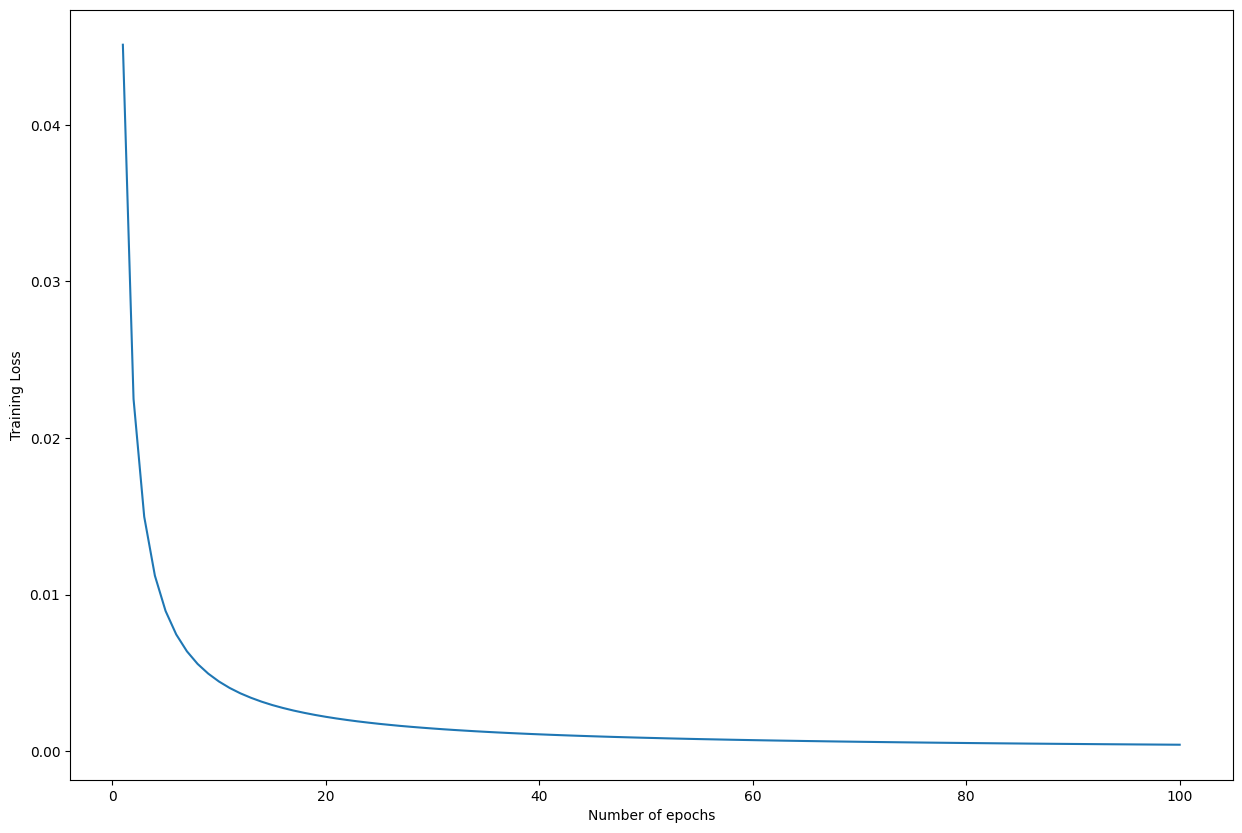

In [27]:
# Plotting the training loss
plt.plot(range(1,num_epochs+1),train_loss)
plt.xlabel("Number of epochs")
plt.ylabel("Training Loss")
plt.show()

ValueError: cannot reshape array of size 1269760 into shape (32,32)

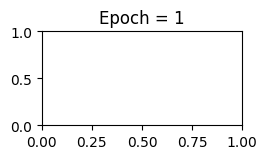

In [131]:
# Plotting is done on a 7x5 subplot
# Plotting the reconstructed images

# Initializing subplot counter
counter = 1

# Plotting reconstructions
# for epochs = [1, 5, 10, 50, 100]
epochs_list = [1, 5, 10, 50]

# Iterating over specified epochs
for val in epochs_list:
	
	# Extracting recorded information
	temp = outputs[val]['out'].detach().cpu().numpy()
	title_text = f"Epoch = {val}"
	
	# Plotting first five images of the last batch
	for idx in range(4):
		plt.subplot(7, 5, counter)
		plt.title(title_text)
		plt.imshow(temp.reshape(32,32), cmap= 'gray')
		plt.axis('off')
		
		# Incrementing the subplot counter
		counter+=1

	# Plotting original images

	# Iterating over first five
	# images of the last batch
	for idx in range(4):
		
		# Obtaining image from the dictionary
		
		temp = outputs[val]['img'].detach().cpu().numpy()
		# Plotting image
		plt.subplot(7,5,counter)
		plt.imshow(temp.reshape(8, 8),
				cmap = 'gray')
		plt.title("Original Image")
		plt.axis('off')
		
		# Incrementing subplot counter
		counter+=1

plt.tight_layout()
plt.show()


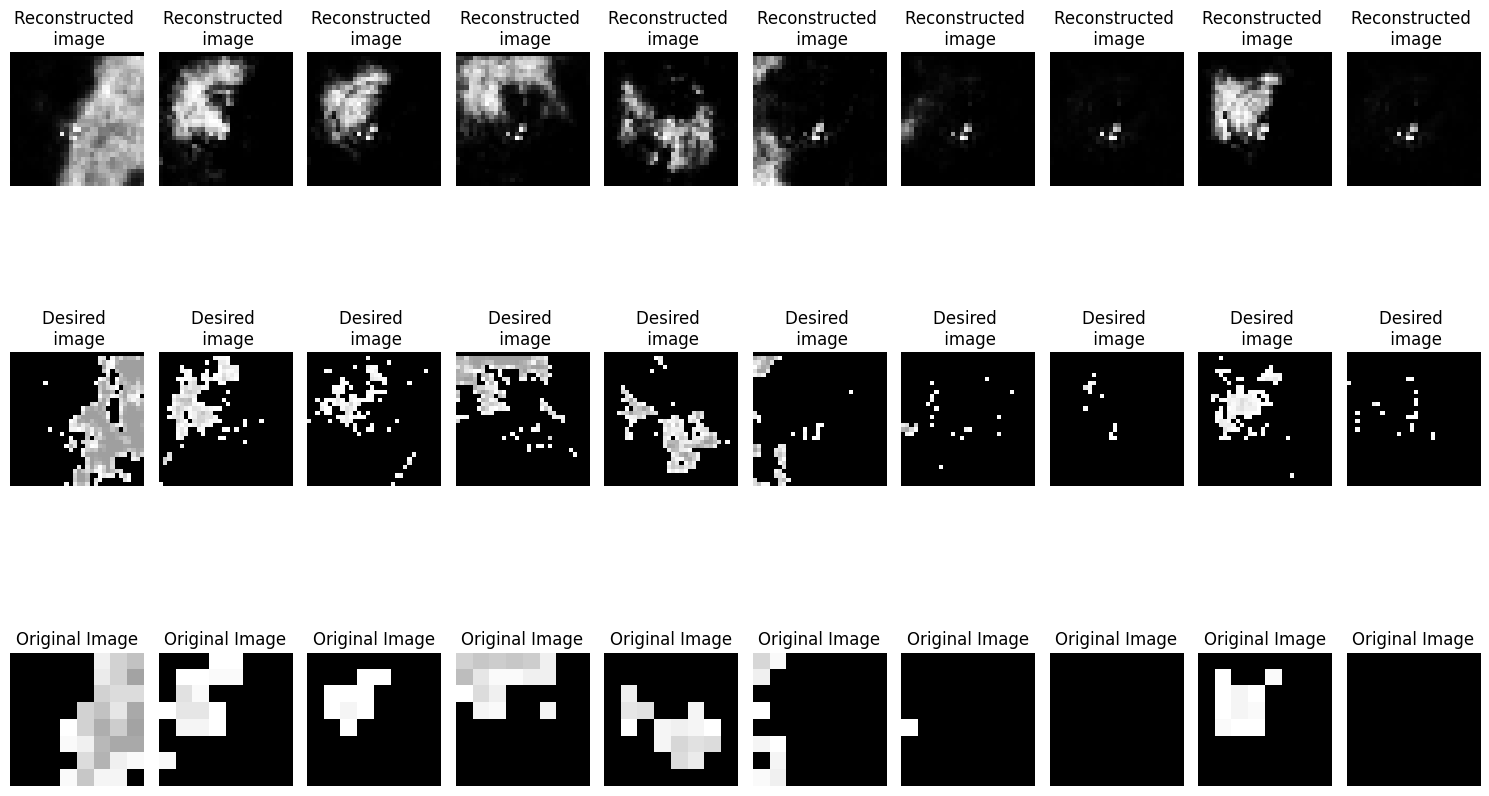

In [29]:
# Dictionary that will store the different
# images and outputs for various epochs
outputs = {}

# Extracting the last batch from the test
# dataset
validation_data = random.sample(val_data, 10)

scored_images = []


for val_item in validation_data:	
	
	to_score = val_item[0].reshape(-1, 8*8)
	to_score = to_score.to('cuda')
	scored = model.decode(to_score)
	
	scored_images.append((val_item[1], scored, val_item[0]))


# Generating output for the obtained
# batch


counter = 1


# Plotting first 10 images of the batch
for idx in range(len(validation_data)):
	plt.subplot(3, 10, counter)
	plt.title("Reconstructed \n image")
	plt.imshow(scored_images[idx][1].cpu().detach().reshape(32, 32), cmap='gray')
	plt.axis('off')

	# Incrementing subplot counter
	counter += 1
 
for idx in range(len(validation_data)):
	plt.subplot(3, 10, counter)
	plt.title("Desired \n image")
	plt.imshow(scored_images[idx][0].cpu().detach().reshape(32, 32), cmap='gray')
	plt.axis('off')

	# Incrementing subplot counter
	counter += 1

# Plotting original images

# Plotting first 10 images
for idx in range(len(validation_data)):
    
    plt.subplot(3, 10, counter)
    plt.imshow(scored_images[idx][2].reshape(8, 8), cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

	# Incrementing subplot counter
    counter += 1

plt.tight_layout()
plt.show()


In [ ]:
torch.save(model.state_dict(), 'RADAR_UPSCALER.pth')

In [ ]:
model2 = DeepAutoencoder()
model2.load_state_dict(torch.load('RADAR_UPSCALER.pth'))
model2 = model.to('cuda')  # Don't forget to move the model to GPU if available